In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [3]:
df['Cylinders'].head()

0    4.0
1    6.0
2    4.0
3    6.0
4    6.0
Name: Cylinders, dtype: float64

In [4]:
df['Cylinders'].describe()

count    35952.000000
mean         5.765076
std          1.755268
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: Cylinders, dtype: float64

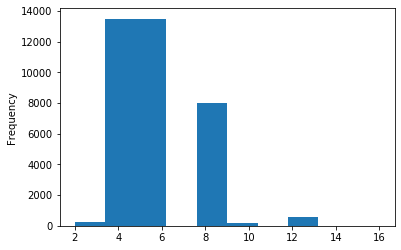

In [6]:
df['Cylinders'].plot(kind= 'hist')

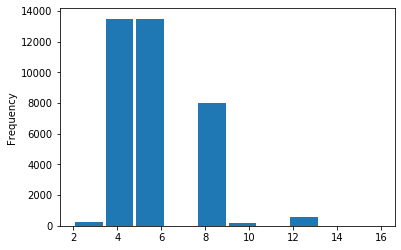

In [11]:
df['Cylinders'].plot(kind= 'hist',rwidth=0.9)


In [4]:
df['Drivetrain'].describe()

count                 35952
unique                    8
top       Front-Wheel Drive
freq                  13044
Name: Drivetrain, dtype: object

In [5]:
df['Drivetrain'].head()

0       2-Wheel Drive
1       2-Wheel Drive
2    Rear-Wheel Drive
3    Rear-Wheel Drive
4    Rear-Wheel Drive
Name: Drivetrain, dtype: object

In [6]:
df['Drivetrain'].value_counts()
# df['Drivetrain'].plot(kind= 'bar')


Front-Wheel Drive             13044
Rear-Wheel Drive              12726
4-Wheel or All-Wheel Drive     6503
All-Wheel Drive                2039
4-Wheel Drive                  1058
2-Wheel Drive                   423
Part-time 4-Wheel Drive         158
2-Wheel Drive, Front              1
Name: Drivetrain, dtype: int64

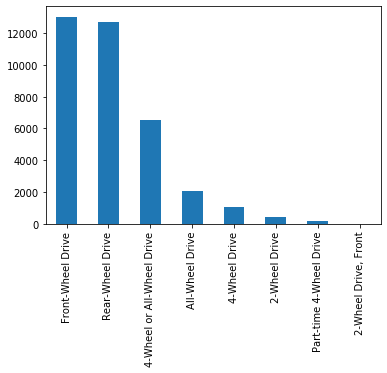

In [8]:
df['Drivetrain'].value_counts().plot(kind= 'bar')

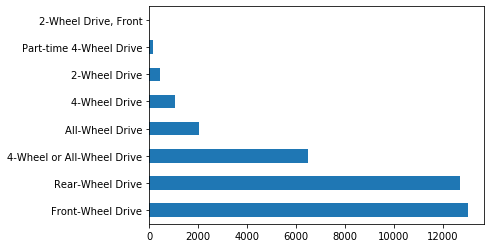

In [9]:
df['Drivetrain'].value_counts().plot(kind= 'barh')

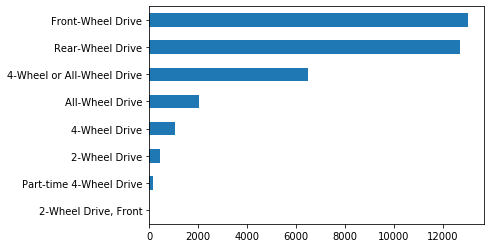

In [10]:
df['Drivetrain'].value_counts(ascending = True).plot(kind= 'barh')

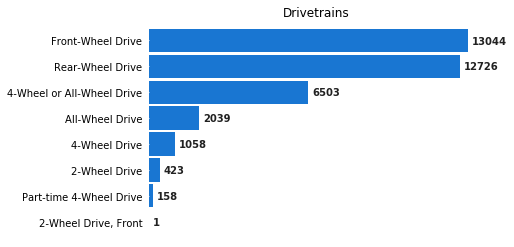

In [15]:
ax = df['Drivetrain'].value_counts(ascending = True).plot(kind= 'barh')
ax.set_title("Drivetrains")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis = u'both', which = u'both', color = 'white')

#move X values to bar ends

ax.get_xaxis().set_visible(False)

for i, val in enumerate(df['Drivetrain'].value_counts(ascending = True)):
    ax.text(val + 150, i - .125, str(val), color = '#212121', fontweight = 'bold')
    
ax = df['Drivetrain'].value_counts(ascending = True).plot(kind= 'barh', color = '#1976d2', width = 0.9)

# BOX PLOTS

In [16]:
df['Combined MPG'].describe()

count    35952.000000
mean        19.929322
std          5.112409
min          7.000000
25%         16.000000
50%         19.000000
75%         23.000000
max         56.000000
Name: Combined MPG, dtype: float64

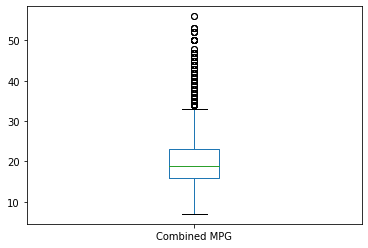

In [17]:
df['Combined MPG'].plot(kind = 'box')

# Seaborn

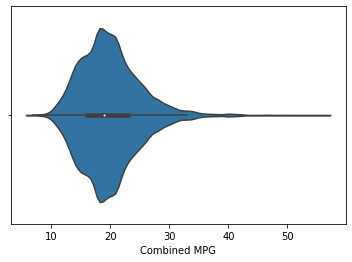

In [18]:
import seaborn as sns
sns.violinplot("Combined MPG", data = df
              )

# Matplotlib

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f46f710>,
       dtype=object))

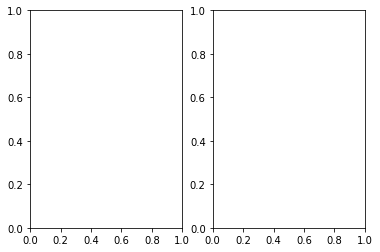

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(1, 2) # n_rows, n_cols

In [5]:
mpg = df.groupby('Year')['City MPG', 'Highway MPG'].mean().reset_index()
mpg.head()

,Year,City MPG,Highway MPG
0,1984,15.485271,19.075969
1,1985,17.872233,23.045541
2,1986,17.675926,22.717172
3,1987,17.414858,22.601836
4,1988,17.321716,22.686327


In [21]:
trend = mpg.query(f"Year == {mpg['Year'].min()} or Year == {mpg['Year'].max()}")
trend

,Year,City MPG,Highway MPG
0,1984,15.485271,19.075969
33,2017,20.336056,27.651109


NameError: name 'mpg' is not defined

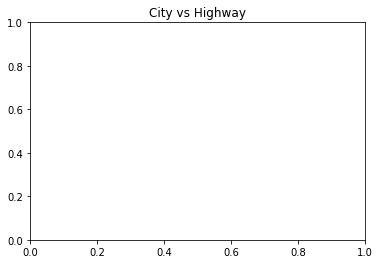

In [4]:
plt.title("City vs Highway")
plt.plot(
    mpg['Year'], #x axis
    mpg['City MPG'] #y axis
)

plt.plot(
    mpg['Year'], #x axis
    mpg['Highway MPG'],
    color = 'green'#y axis
)

plt.plot(
    trend['Year'], #x axis
    trend['City MPG'],  #y axis
    ls = '--', #line stile
    lw = 1
)


In [ ]:
df = df